# Import the required libraries

In [25]:
import instaloader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the Instagram account credentials

In [26]:
username = "testing_fyp"
password = "Testing@fyp"

# Create an instance of Instaloader class and login to the Instagram account

In [27]:
L = instaloader.Instaloader()
try:
    L.load_session_from_file(username)
    L.context.log("Login successful.")
except FileNotFoundError:
    L.context.log("Session file does not exist yet - Logging in.")
    L.context.log("Logging in to Instagram account...")
    L.context.log("Please wait...")
    L.context.log("This may take a while depending on the number of followers and followees.")
    L.interactive_login(username)

Session file does not exist yet - Logging in.
Logging in to Instagram account...
Please wait...
This may take a while depending on the number of followers and followees.


# Scraping the data from Instagram

In [28]:
# Define the list of accounts to scrape
accounts = [
    {"category": "food", "username": "f_delhite"},
    {"category": "food", "username": "thecoachmarlow"},
    {"category": "food", "username": "londonbylora"},
    {"category": "food", "username": "non_veg_lovers"},
    {"category": "food", "username": "lekhas_feast"},
    {"category": "photography", "username": "natural_photography123_"},
    {"category": "photography", "username": "phot.ographyislife1"},
    {"category": "photography", "username": "mimimandira_clicks"},
    {"category": "photography", "username": "ija_photography"},
    {"category": "photography", "username": "colours.of.india"},
    {"category": "dance", "username": "dance_n_addiction"},
    {"category": "dance", "username": "ishpreet_dang"},
    {"category": "dance", "username": "manoletyet"},
    {"category": "dance", "username": "yashpandyachoreography"},
    {"category": "dance", "username": "sneadesai"},
    {"category": "sports", "username": "stn.daily"},
    {"category": "sports", "username": "judo.olymp_"},
    {"category": "sports", "username": "thesizeup"},
    {"category": "sports", "username": "ball__star"},
    {"category": "sports", "username": "thebsblr"}
]

# Initialize an empty list to store the scraped data
all_data = []

# Loop through each account in the list
for account in accounts:

    # Get the profile of the Instagram account
    profile = instaloader.Profile.from_username(L.context, account['username'])

    # Get the number of followers of the account
    num_followers = profile.followers

    # Get the number of posts of the account
    num_posts = profile.mediacount

    # Get the last 10 posts of the account and store the data in a list of dictionaries
    posts = profile.get_posts()
    posts_data = []
    for post in posts:
        if len(posts_data) >= 10:
            break
        else:
            post_data = {"Category": account['category'],
                         "Username": account['username'],
                         "Time of Posting": post.date.hour, 
                         "Number of Followers": num_followers, 
                         "Number of Posts": num_posts, 
                         "Likes": post.likes}
            posts_data.append(post_data)

    # Add the post data to the list of all data
    all_data.extend(posts_data)

# Convert the list of data into a pandas DataFrame
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

    Category   Username  Time of Posting  Number of Followers   
0       food  f_delhite                5                59675  \
1       food  f_delhite                5                59675   
2       food  f_delhite                5                59675   
3       food  f_delhite               12                59675   
4       food  f_delhite                4                59675   
..       ...        ...              ...                  ...   
195   sports   thebsblr               15               781735   
196   sports   thebsblr                3               781735   
197   sports   thebsblr                2               781735   
198   sports   thebsblr                1               781735   
199   sports   thebsblr               23               781735   

     Number of Posts   Likes  
0                963  392962  
1                963  818661  
2                963  140451  
3                963   17654  
4                963     221  
..               ...     ...  
19

# Describing the data

In [29]:
print(df.describe())

       Time of Posting  Number of Followers  Number of Posts         Likes
count       200.000000         2.000000e+02       200.000000  2.000000e+02
mean         10.450000         2.407346e+05      2296.500000  7.715236e+04
std           5.457695         3.535411e+05      3414.841087  3.808680e+05
min           0.000000         1.192900e+04        87.000000 -1.000000e+00
25%           6.000000         3.080525e+04       550.750000  3.752500e+02
50%          10.000000         8.714050e+04      1037.500000  2.550500e+03
75%          14.000000         1.681388e+05      1876.750000  9.102500e+03
max          23.000000         1.303399e+06     13364.000000  3.405680e+06


# Visulaization of data

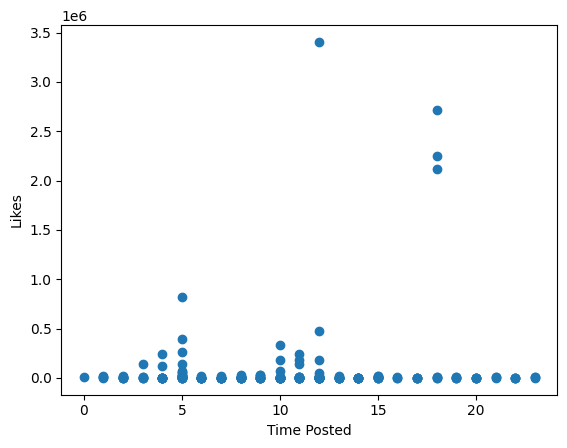

In [30]:
# Create a scatter plot of likes vs. time posted
plt.scatter(df['Time of Posting'], df['Likes'])
plt.xlabel('Time Posted')
plt.ylabel('Likes')
plt.show()

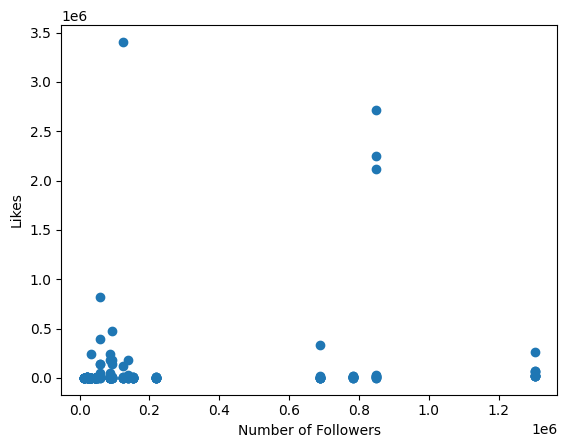

In [31]:
# Create a scatter plot of likes vs. number of followers
plt.scatter(df['Number of Followers'], df['Likes'])
plt.xlabel('Number of Followers')
plt.ylabel('Likes')
plt.show()

# Data Pre-Processing

In [41]:
# Define the features and target variable
X = df[['Category','Time of Posting', 'Number of Followers', 'Number of Posts']]
y = df['Likes']

# Normalize the target
maxvalue = max(y)
y=y/maxvalue

# Define the column transformer to encode the categorical feature
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')

# Fit and transform the column transformer on the feature data
X = ct.fit_transform(X)
# Define the scaler to normalize the feature data
scaler = MaxAbsScaler()

# Fit and transform the scaler on the feature data
X = scaler.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

  (0, 0)	1.0
  (0, 17)	1.0
  (0, 28)	0.009152224299696409
  (0, 29)	0.05477401975456451
  (1, 3)	1.0
  (1, 16)	1.0
  (1, 28)	0.01657665841388554
  (1, 29)	0.013094881771924574
  (2, 0)	1.0
  (2, 9)	1.0
  (2, 28)	1.0
  (2, 29)	0.13596228674049687
  (3, 0)	1.0
  (3, 17)	1.0
  (3, 28)	0.6519929814277899
  (3, 29)	0.05267883867105658
  (4, 0)	1.0
  (4, 15)	1.0
  (4, 28)	0.018357387108629053
  (4, 29)	0.01803352289733613
  (5, 0)	1.0
  (5, 17)	1.0
  (5, 28)	0.16754808005837046
  (5, 29)	0.09937144567494763
  (6, 1)	1.0
  :	:
  (153, 29)	0.01803352289733613
  (154, 2)	1.0
  (154, 8)	1.0
  (154, 28)	0.09457272868860571
  (154, 29)	0.042053277461837776
  (155, 1)	1.0
  (155, 14)	1.0
  (155, 28)	0.0180911601129048
  (155, 29)	0.04946123914995511
  (156, 1)	1.0
  (156, 14)	1.0
  (156, 28)	0.020592312868124036
  (156, 29)	0.1221191260101766
  (157, 2)	1.0
  (157, 16)	1.0
  (157, 28)	0.09457272868860571
  (157, 29)	0.042053277461837776
  (158, 1)	1.0
  (158, 21)	1.0
  (158, 28)	0.0328111345796644


# Training the ML Regression Model

In [33]:
# Create an instance of the LinearRegression class
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.1367091281351886


# Prediction of Values

In [45]:
category_encoded = ct.transform([["sports", 12, 5000, 10]])
predicted_likes = model.predict(category_encoded)
print("Predicted number of likes on the post:", int(predicted_likes*maxvalue))

Predicted number of likes on the post: 495727647


c:\Users\kundu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [35]:
import pickle

In [47]:
# Save the model and column transformer
data = {"model": model, "ct": ct, "scaler": scaler}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

# Load the model and column transformer
with open('saved_model.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]
ct_loaded = data["ct"]
scaler_loaded = data["scaler"]